In [1]:
import os
import random

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
import statsmodels.api as sm

# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import auc, precision_recall_curve, accuracy_score, roc_curve

# For reproductibility
SEED = 42
random.seed(SEED)

In [2]:
# Set the working directory and load the dataset as a Pandas dataframe
PATH = "C:/Users/<NAME>/Documents/..."
os.chdir(PATH)

df = pd.read_csv("inputs/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Overiview of the dataset
print("Dataset shape where the target variable is called 'output': ", df.shape)
print("\nNbr of nulls per variables")
print(df.isnull().sum())

Dataset shape where the target variable is called 'output':  (303, 14)

Nbr of nulls per variables
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
"""
Unique count values per variables
---------------------------------

Reminder: In statistics, a categorical variable is a variable that can take on
one of a limited, and usually fixed, number of possible values (...).
Source: Wikipedia

Since none of the variables have any null values we can directly identify the categorical variables.

Categorical: sex, cp, fbs, restecg, exng, slp, caa, thall

"""

df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Summary statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


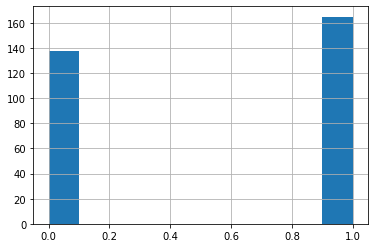

In [7]:
# By looking at the target variable, it seems that the dataset is balanced
df["output"].hist()

In [8]:
# Analyze by pivoting features
df[['sex', 'output']]\
    .groupby(['sex'], as_index=False)\
    .mean()\
    .sort_values(by='output', ascending=False)

,sex,output
0,0,0.750000
1,1,0.449275


In [9]:
"""
Chest Pain type (cp)
--------------------

Values:
    1: typical angina
    2: atypical angina
    3: non-anginal pain
    4: asymptomatic
"""

df[['cp', 'output']]\
    .groupby(['cp'], as_index=False)\
    .mean()\
    .sort_values(by='output', ascending=False)

,cp,output
1,1,0.820000
2,2,0.793103
3,3,0.695652
0,0,0.272727


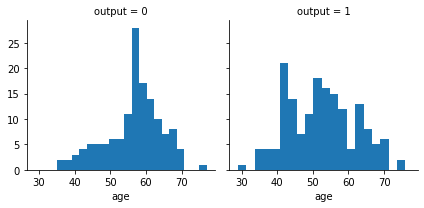

In [10]:
# Observing the distribution between the target and age
fg = sns.FacetGrid(df, col='output')
fg.map(plt.hist, 'age', bins=20)

In [11]:
# Normalize the continuous variables
scaler = Normalizer()
COLS_TO_NORMALIZE = [
    "age",
    "trtbps",
    "chol",
    "thalachh",
    "oldpeak"
]
df[COLS_TO_NORMALIZE] = scaler.fit_transform(df[COLS_TO_NORMALIZE] )

In [12]:
# We split the the data into a training a test set
TARGET = "output"
FEATURES = [f for f in df.columns.tolist() if f != TARGET]

X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df[[TARGET]], test_size=0.2, random_state=SEED)

In [13]:
"""
K-Nearest Neighbor
------------------

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method.
It is used for classification and regression.

In k-NN classification, the output is a class membership. An object is classified by a plurality vote
of its neighbors, with the object being assigned to the class most common among its k nearest neighbors
(k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of
that single nearest neighbor.

Source: Wikipedia
"""
knn = KNeighborsClassifier()

# Search space of 1 dimension
parameters = {
    "n_neighbors": np.arange(1, 10),
    "algorithm": ['brute']
}

# Grid search CV (10 folds) optimized for the accuracy
# (one can also try with the auc_roc scoring)
searcher = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    refit=True # if True, refit an estimator using the best found parameters on the whole dataset.
)

# Training
searcher.fit(X_train, np.ravel(y_train))

# Tuned Hyperparameter
best_score = round(searcher.best_score_*100, 2)
best_param = searcher.best_params_['n_neighbors']
print("Best in sample accuracy score {}% is achieved with parameter n_neighbors={}".format(best_score, best_param))

Best in sample accuracy score 83.92% is achieved with parameter n_neighbors=9


In [14]:
# Prediction on the test set
y_score = searcher.predict(X_test)

print("Out-of-sample accuracy score: {}%".format(round(accuracy_score(y_test, y_score)*100, 2)))

Out-of-sample accuracy score: 88.52%


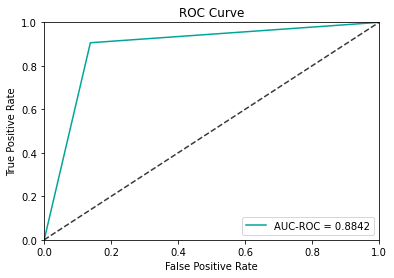

In [15]:
"""
Receiver Operating Characteristic (ROC) curve
---------------------------------------------

A receiver operating characteristic curve, or ROC curve, is a graphical plot that
illustrates the diagnostic ability of a binary classifier system as its discrimination
threshold is varied.

Source: Wikipedia
"""

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='#00A499', label='AUC-ROC = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='#373A36', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()